# Loading and plotting a graph using our naïve Graph_Matrix class


In [1]:
from lib.basic_graph_matrix import Graph_Matrix

## Storing a graph on disk

- edge list : see examples in 
    - https://networkx.org/documentation/stable/reference/readwrite/edgelist.html
    - https://igraph.org/c/doc/igraph-Foreign.html#simple-edge-list-and-similar-formats
    - https://gephi.org/users/supported-graph-formats/csv-format/
    - https://scikit-network.readthedocs.io/en/latest/reference/data.html

## Datasets

- NetSet https://netset.telecom-paris.fr/
- SNAP https://snap.stanford.edu/data/
- Network Repository https://networkrepository.com/

## Example: Karate

```
%%MatrixMarket matrix coordinate pattern symmetric
% kind: undirected graph
%-------------------------------------------------------------------------------
% notes:
% Network collection from M. Newman
% http://www-personal.umich.edu/~mejn/netdata/
%
% The graph "karate" contains the network of friendships between the 34
% members of a karate club at a US university, as described by Wayne Zachary
% in 1977. ...
%-------------------------------------------------------------------------------
34 34 78
2 1
3 1
4 1
5 1
```

In [2]:
# Karate
FILENAME = "data/soc-karate/soc-karate.mtx"
N = 34  # we know the number of nodes = 34
G = Graph_Matrix(34)
with open(FILENAME, encoding="utf-8") as f:
    for line in f:
        if line and line[0] != "%":
            fields = line.split()
            if len(fields) == 2:  # select only line with edge definition
                node1, node2 = int(fields[0]) - 1, int(fields[1]) - 1
                G.add_edge(node1, node2)

print(G.get_edges())

[(1, 0), (2, 0), (2, 1), (3, 0), (3, 1), (3, 2), (4, 0), (5, 0), (6, 0), (6, 4), (6, 5), (7, 0), (7, 1), (7, 2), (7, 3), (8, 0), (8, 2), (9, 2), (10, 0), (10, 4), (10, 5), (11, 0), (12, 0), (12, 3), (13, 0), (13, 1), (13, 2), (13, 3), (16, 5), (16, 6), (17, 0), (17, 1), (19, 0), (19, 1), (21, 0), (21, 1), (25, 23), (25, 24), (27, 2), (27, 23), (27, 24), (28, 2), (29, 23), (29, 26), (30, 1), (30, 8), (31, 0), (31, 24), (31, 25), (31, 28), (32, 2), (32, 8), (32, 14), (32, 15), (32, 18), (32, 20), (32, 22), (32, 23), (32, 29), (32, 30), (32, 31), (33, 8), (33, 9), (33, 13), (33, 14), (33, 15), (33, 18), (33, 19), (33, 20), (33, 22), (33, 23), (33, 26), (33, 27), (33, 28), (33, 29), (33, 30), (33, 31), (33, 32)]


In [3]:
print(G)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

## Drawing the graph

How to draw the graph ?

We have to assign $(x,y)$ coordinates to each node.

First, let's do it randomly in a WxH rectangle:

In [3]:

W, H = 600, 400
from random import randint

coordinates = []
for n in range(N):
    coordinates.append((randint(0, W - 1), randint(0, H - 1)))

## Plotting using matplotlib

See https://matplotlib.org/stable/tutorials/index.html


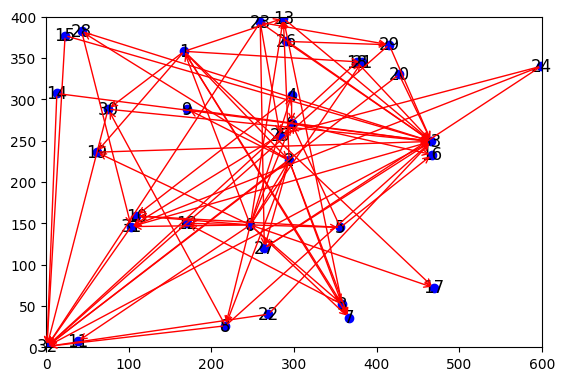

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def plot_graph(G, coordinates):
    fig, ax = plt.subplots()

    # Check if coordinates length matches the number of nodes
    if len(coordinates) != len(G.get_nodes()):
        raise ValueError("Coordinates length does not match the number of nodes")

    # Plot nodes
    for node, (x, y) in enumerate(coordinates):
        ax.scatter(x, y, color='blue')  # blue nodes
        ax.text(x, y, str(node), color='black', fontsize=12, ha='center', va='center')

    # Plot directed edges
    for node1, node2 in G.get_edges():
        start = coordinates[node1]
        end = coordinates[node2]

        # Draw an arrow from start to end
        ax.annotate("",
                    xy=start, xycoords='data',
                    xytext=end, textcoords='data',
                    arrowprops=dict(arrowstyle="->", color='red'))

    ax.set_aspect('equal')
    plt.xlim(0, W)  # Assuming W is the width of the rectangle
    plt.ylim(0, H)  # Assuming H is the height of the rectangle
    plt.show()

plot_graph(G, coordinates)

OK, but the coordinates could be better, to get a more readable drawing !

This is the art of graph visualization...

- Handbook of Graph Drawing and Visualization (Discrete Mathematics and Its
  Applications) Roberto Tamassia, 2016.

- Graph Drawing: Algorithms for the Visualization of Graphs, by Ioannis G.
  Tollis, Giuseppe Di Battista, Peter Eades, 1998.

Next we will use **NetworkX**, alowing use to use more sophisticated
visualization algorithms.